In [522]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")

In [523]:
#Step-> 1 Generate Dummp Dataset
X, y = make_blobs(n_samples=2000, centers=2, n_features=2, random_state=42, cluster_std=3)
n_features = 2
print(X.shape, y.shape)

(2000, 2) (2000,)


In [524]:
print(y)

[0 0 0 ... 1 0 1]


In [525]:
def visualize(X,y):
    plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

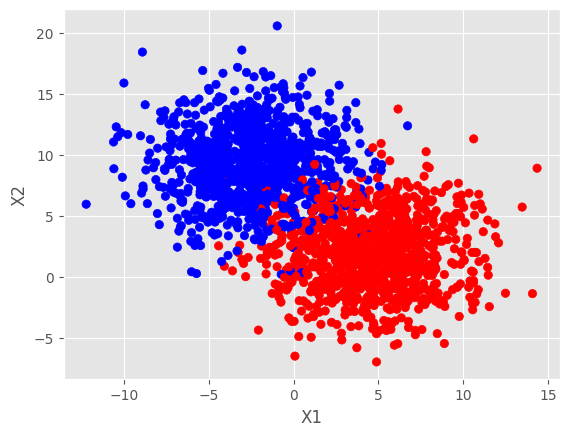

In [526]:
visualize(X,y)

In [527]:
def normalise(X):
  u = X.mean(axis = 0)
  std = X.std(axis = 0)

  return (X-u)/std

In [528]:
X = normalise(X)

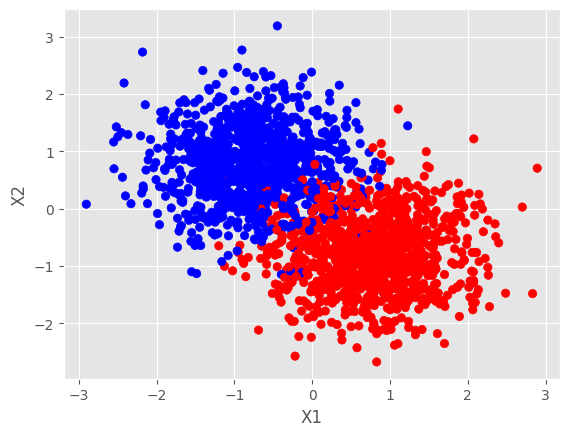

In [529]:
visualize(X,y)

In [530]:
#Step4 -> Train Test Split

XT, Xt, yT, yt = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)
print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)


(1500, 2) (1500,)
(500, 2) (500,)


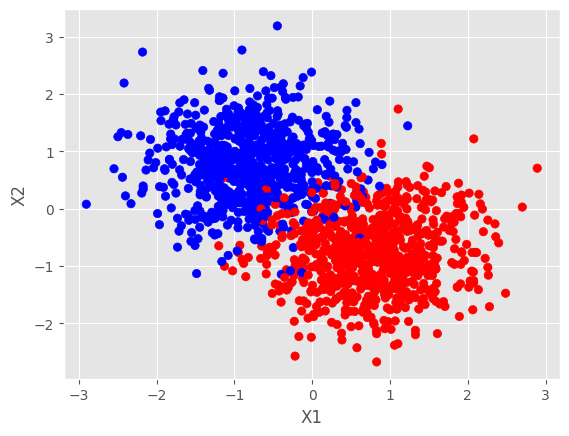

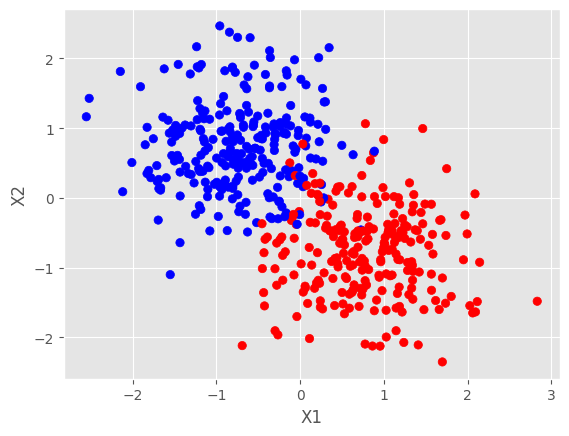

In [531]:
visualize(XT,yT)
visualize(Xt,yt)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


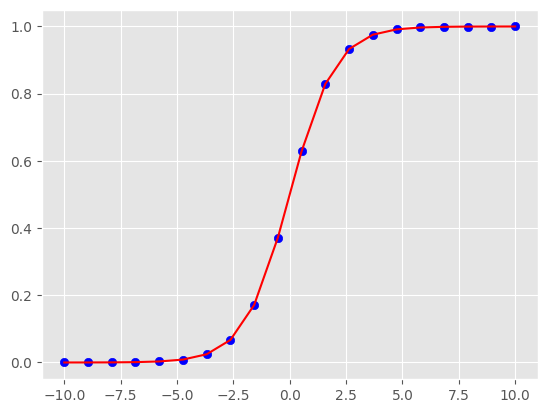

In [532]:
#Hypothesis/Modeling
def sigmoid(z):
  return 1/(1+np.exp(-z))

# print(sigmoid(10))
# print(sigmoid(-10))

z = np.linspace(-10,10,20)
print(z)
plt.scatter(z, sigmoid(z), c="blue")
plt.plot(z, sigmoid(z), c="red")
plt.show()

def hypothesis(X, theta):
  return sigmoid(np.dot(X, theta))

def error(y, yp):
  eps = 1e-8
  loss = -np.mean(y*np.log(yp + eps) + (1-y)*np.log(1-yp + eps))
  return loss

def gradient(X, y, yp):
  m = X.shape[0]
  grad = -(1/m)*np.dot(X.T, (y-yp))
  return grad

def train(X,y,max_iter=100, learning_rate=0.1):
  theta = np.random.randn(n_features + 1,1)
  error_list = []
  for i in range(max_iter):
    yp = hypothesis(X, theta)
    e = error(y,yp)
    error_list.append(e)
    grad = gradient(X,y,yp)
    theta = theta - learning_rate*grad
  plt.plot(error_list)
  return theta

def predict(X, theta):
  h = hypothesis(X, theta)
  preds = np.zeros((X.shape[0],1,),dtype='int')
  preds[h>=0.5] = 1
  preds[h<0.5] = 0
  return preds


def accuracy(X, y, theta):
  preds = predict(X, theta)
  return ((y == preds).sum())/y.shape[0]*100

In [533]:
def addExtraColumn(X):
  if X.shape[1] == n_features:
    ones = np.ones((X.shape[0],1))
    return np.hstack((ones, X))
  else:
    return X

In [534]:
XT = addExtraColumn(XT)
Xt = addExtraColumn(Xt)
print(XT.shape, Xt.shape)
print(yT.shape, yt.shape)
print(XT)
print(Xt)

(1500, 3) (500, 3)
(1500,) (500,)
[[ 1.         -1.43211741  0.65078613]
 [ 1.         -0.47100516  0.87372191]
 [ 1.         -0.40182883  2.1275269 ]
 ...
 [ 1.          0.02390726  0.74454457]
 [ 1.         -0.35936993  0.18771848]
 [ 1.          1.09360417 -1.10077065]]
[[ 1.         -1.17860853  1.9119189 ]
 [ 1.          0.70445084 -1.55536144]
 [ 1.          0.39063944 -0.10336496]
 ...
 [ 1.          1.96970601 -0.24632291]
 [ 1.         -0.80805197 -0.01411826]
 [ 1.          0.83964924  0.53655099]]


In [535]:
yT = yT.reshape(-1,1)
yt = yt.reshape(-1,1)
print(yT.shape, yt.shape)

(1500, 1) (500, 1)


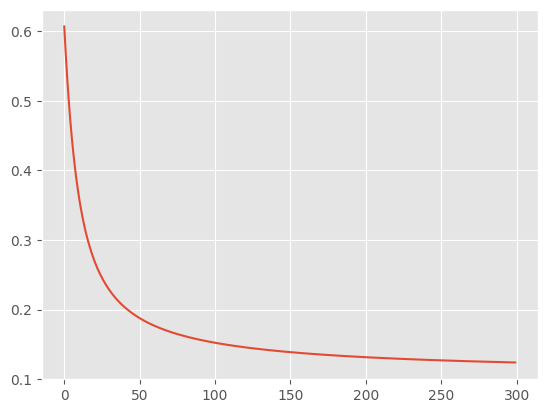

In [536]:
theta = train(XT, yT, max_iter=300, learning_rate = 0.2)

In [537]:
theta

array([[ 0.05091729],
       [ 2.54845178],
       [-2.6512863 ]])

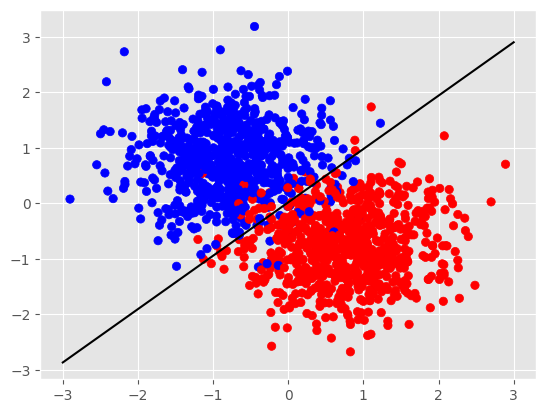

In [538]:
plt.scatter(XT[:,1], XT[:,2], c=yT.ravel(), cmap="bwr")
x1 = np.linspace(-3, 3, 6)
x2 = -(theta[0][0] + theta[1][0]*x1)/theta[2][0]
plt.plot(x1, x2, c="black")
plt.show()

In [539]:
preds = predict(Xt, theta)

In [540]:
print(accuracy(XT,yT,theta))
print(accuracy(Xt,yt,theta))

95.86666666666666
96.2


In [541]:
# ----------Multiple Classification---------- #

In [542]:
# One-Vs-Rest [OvR]
X, y = make_blobs(n_samples=2000, centers=3, n_features=3, random_state=42, cluster_std=3)


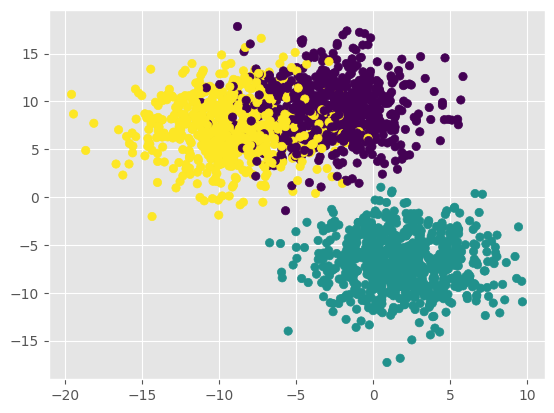

In [543]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [544]:
print(np.unique(y,return_counts = True))

(array([0, 1, 2]), array([667, 667, 666]))


In [545]:
model = LogisticRegression(multi_class = 'ovr')

In [546]:
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [547]:
model.predict(X)

array([2, 2, 1, ..., 1, 1, 0])

In [548]:
model.score(X,y)

0.925

In [550]:
# ----------One-Vs-One Strategy----------